# Snow Data

Tool to import archived snow data and manipulate it using python pandas. Eventually
to plot with plotlinkedinly/dash app of some kind.

## Importing the data

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dash import Dash, html, dcc, Input, Output, callback

from datetime import datetime

df = pd.read_csv('./snow/SW_DailyArchive.csv',index_col=[0],parse_dates=[0]) #Here the [0] tells fxn to parse first column
len(df)
df.describe()

,1A02P McBride Upper,1A03P Barkerville,1A05P Longworth Upper,1A12P Kaza Lake,1A14P Hedrick Lake,1A15P Knudsen Lake,1A17P Revolution Creek,1A19P Dome Mountain,1B01P Mount Wells,1B02P Tahtsa Lake,...,4C11P Bluff Creek,4C20P Sierra Climate,4C21P Two Island Climate,4C22P Kiwigana Climate,4D08P Forrest-Kerr Creek,4D10P Tumeka Creek,4D11P Kinaskan Lake,4D14P Wade Lake,4D16P Forrest Kerr Mid Elevation Snow,4D17P Forrest Kerr High Elevation Snow
count,9297.000000,17055.000000,2555.000000,2507.000000,8614.000000,2741.000000,14110.000000,6444.000000,11135.000000,12313.000000,...,2869.000000,1753.000000,1684.000000,1454.000000,3789.000000,8852.000000,9982.000000,6648.00000,2710.000000,2741.000000
mean,129.774121,124.221812,392.271233,122.575588,313.242860,321.738417,335.846704,340.697703,237.415806,512.675627,...,72.539212,30.166001,38.849762,27.231774,176.509633,228.661319,133.428171,139.51414,409.763100,632.003283
std,192.418406,145.284426,393.550451,132.297578,358.147732,357.635361,366.745955,339.659365,245.287963,547.575450,...,108.974542,42.590815,50.615587,42.494167,208.875717,232.098169,159.810826,147.49929,395.192021,541.946884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,135.000000
50%,0.000000,56.000000,306.000000,70.000000,176.000000,224.000000,203.000000,261.000000,171.000000,351.000000,...,0.000000,0.000000,13.000000,0.000000,52.000000,174.000000,56.000000,94.00000,346.500000,575.000000
75%,252.000000,236.000000,685.000000,243.000000,573.750000,504.000000,608.000000,608.000000,437.000000,955.000000,...,132.000000,62.000000,71.000000,36.000000,344.000000,402.000000,247.000000,259.00000,670.750000,948.000000
max,754.000000,556.000000,1412.000000,425.000000,1329.000000,1446.000000,1379.000000,1223.000000,957.000000,2360.000000,...,369.000000,167.000000,199.000000,162.000000,822.000000,881.000000,668.000000,558.00000,1335.000000,2158.000000


## Munging data to consistent timestamps and getting some useful indexes

In [113]:

#Deal with the non-daily observations. Most are on the 16:00, some are on the 00:00 and others are on the even hour.
df.index.strftime('%H').unique()

Index(['16', '18', '20', '22', '00', '02', '04', '06', '08', '10', '12', '14',
       '17', '19', '21', '23', '01', '03', '05', '07', '09', '11', '13', '15'],
      dtype='object', name='DATE(UTC)')


Looks like there are stations that have data at a non-standard time of 16:00. Six stations that have data on the even hour at some point in their record. These are '1A02P McBride Upper', '1B02P Tahtsa Lake', '1B08P Mt. Pondosy', '2F18P Brenda Mine', '3A25P Squamish River Upper', '3A28P Tetrahedron'. In all of these stations, the hourly data is in addition to the data reported at 16:00. So, can safely drop all of the excess data without worry. 



/tmp/ipykernel_8613/333439812.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_8613/333439812.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



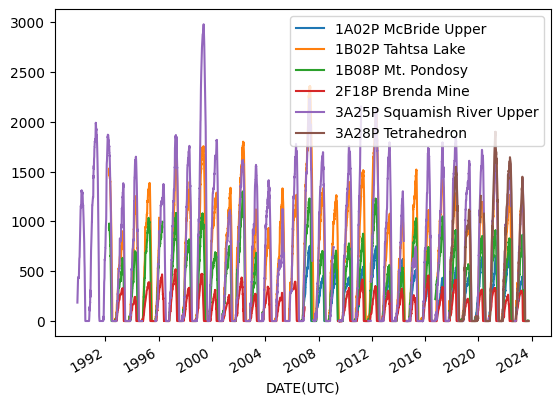

In [114]:
plt.close("all")
#Subset the data following the stations with hourly records
dfsub1 = df[['1A02P McBride Upper', '1B02P Tahtsa Lake', '1B08P Mt. Pondosy', '2F18P Brenda Mine', '3A25P Squamish River Upper', '3A28P Tetrahedron']]
#Set the rows with hours != 16:00 to NaN
dfsub1[dfsub1.index.strftime('%H').isin(['00','01','02','03','04','05','06','07','08','09','10','11',
                                       '12','13','14','15','17','18','19','20','21','22','23'])] = np.nan
#Drop the NaN rows
dfsub1 = dfsub1.dropna(axis=0,how='all')
dfsub1.plot();


Additionally, the stations '4D16P Forrest Kerr Mid Elevation Snow', '4D17P Forrest Kerr High Elevation Snow' have data on the 00:00. These also appear not to have data on the 16:00. So, perhaps we can simply move those timestamps by the 16 hours to make them 

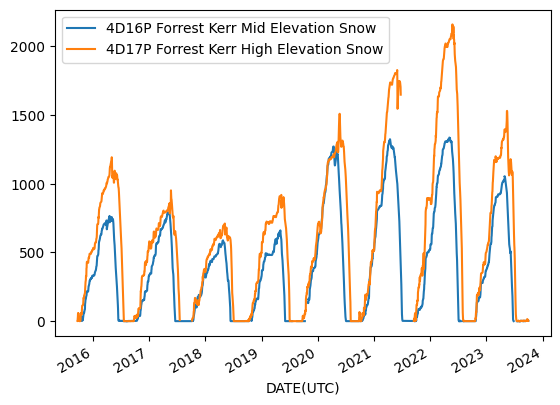

In [115]:
dfsub2 = df[['4D16P Forrest Kerr Mid Elevation Snow','4D17P Forrest Kerr High Elevation Snow']]
dfsub2 = dfsub2.dropna(axis=0,how='all')
dfsub2.index += pd.Timedelta("16 hours")
dfsub2.plot();



Now simply merge the three data frames into a master data frame that only has the data we want. 


In [116]:
#Subset the 
dfsub3 = df.loc[:,~df.columns.isin(['1A02P McBride Upper', '1B02P Tahtsa Lake', '1B08P Mt. Pondosy', '2F18P Brenda Mine', '3A25P Squamish River Upper', '3A28P Tetrahedron','4D16P Forrest Kerr Mid Elevation Snow','4D17P Forrest Kerr High Elevation Snow'])]
dfsub3[dfsub3.index.strftime('%H') == '22'] = np.nan
dfsub3 = dfsub3.dropna(axis=0,how='all')
dfsub3 = dfsub3.join(dfsub2)
dfsub3 = dfsub3.join(dfsub1)
df = dfsub3.dropna(axis=0,how='all')


/tmp/ipykernel_8613/2636599436.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_8613/2636599436.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='jday'>

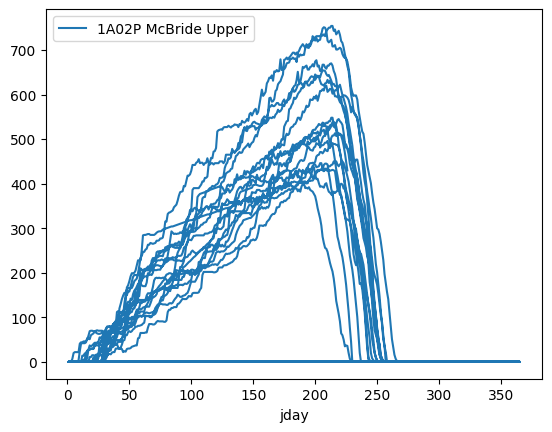

In [117]:
df['jday'] = df.index.strftime('%j').astype(int)
df['jday'] += -273
#df['jday']
df['jday'] = df['jday'].mask(df['jday']<1,df['jday']+365)

df.plot('jday','1A02P McBride Upper')



Make a column formatted so that gives the hydrological year. Essentially the time index, forward by 3 months,
then reformatted to %Y using strftime.


In [118]:
def datetimepandas(timestamp):
    return datetime.strftime(timestamp,'%Y')
df['hydrological_year'] = df.index + pd.Timedelta("92 day")
df['hydrological_year'] = df['hydrological_year'].apply(datetimepandas)
#df['hydrological_year'] = df['hydrological_year'].astype(int)


<Axes: xlabel='jday'>

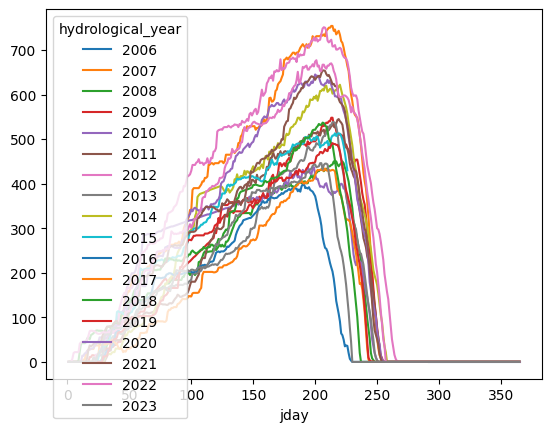

In [126]:
index = pd.MultiIndex.from_frame(df[['hydrological_year','jday']])
#df['datetime'] = df.index
#df.index = df['jday']
subdf = df[['1A02P McBride Upper','hydrological_year','jday']]
subdf_pivoted = pd.pivot_table(subdf,index=["jday"],columns="hydrological_year",values="1A02P McBride Upper")
subdf_pivoted.plot()
#df['1A02P McBride Upper'].plot()

In [125]:

#Melt the dataframe into a long format for plotting flexibility.
meltdf = df.melt(var_name='Snow_Survey_Station',value_name='Snow_Amount', ignore_index=False)

#Get the min and max date and years
mindate = min(df.index)
minyear = datetime.strftime(mindate,'%Y')
maxdate = max(df.index)
maxyear = datetime.strftime(maxdate,'%Y')
print (mindate,maxdate,minyear,maxyear)

1967-10-01 16:00:00 2023-09-30 16:00:00 1967 2023


First, lets make a multi-year plot of the data for a given station along an axis that is the days of the water year.

In [9]:
#Make a column that is the days of the water year. Convert date to julian day
#df['DATE(UTC)'].unique()

In [10]:
app = Dash(__name__)
app.layout = html.Div([
    dcc.Dropdown(
        df.columns[1:],
        id='snow-station-name',
        multi=True
    )
])    
if __name__ == '__main__':
    app.run(debug=True,port=8049)
df.columns[1:]

Index(['1A05P Longworth Upper', '1A12P Kaza Lake', '1A14P Hedrick Lake',
       '1A15P Knudsen Lake', '1A17P Revolution Creek', '1A19P Dome Mountain',
       '1B01P Mount Wells', '1C05P McGillivray Pass', '1C12P Green Mountain',
       '1C14P Bralorne',
       ...
       '4D14P Wade Lake', '4D16P Forrest Kerr Mid Elevation Snow',
       '4D17P Forrest Kerr High Elevation Snow', '1A02P McBride Upper',
       '1B02P Tahtsa Lake', '1B08P Mt. Pondosy', '2F18P Brenda Mine',
       '3A25P Squamish River Upper', '3A28P Tetrahedron', 'jday'],
      dtype='object', length=118)

In [62]:
meltdf.dtypes

DATE(UTC)              datetime64[ns]
Snow_Survey_Station            object
Snow_Amount                   float64
dtype: object

In [63]:
#lets extract the year, month and day from the date column.

